In [98]:
import pandas as pd
import numpy as np
import networkx as nx
from pyvis.network import Network

In [24]:
G = nx.karate_club_graph()
# greedy_c = nx.community.greedy_modularity_communities(G)
# louvain_c = nx.community.louvain_communities(G)
# lpa_c = nx.community.label_propagation_communities(G)

In [38]:
def get_communities(current_graph):
    greedy = nx.community.greedy_modularity_communities(current_graph)
    louvain = nx.community.louvain_communities(current_graph)
    lpa = nx.community.label_propagation_communities(current_graph)
    return greedy, louvain, lpa

In [40]:
greedy_c, louvain_c, lpa_c = get_communities(G)

In [18]:
greedy_c, len(greedy_c)

([frozenset({8,
             14,
             15,
             18,
             20,
             22,
             23,
             24,
             25,
             26,
             27,
             28,
             29,
             30,
             31,
             32,
             33}),
  frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}),
  frozenset({0, 4, 5, 6, 10, 11, 16, 19})],
 3)

In [31]:
louvain_c, len(louvain_c)

([{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21},
  {4, 5, 6, 10, 16},
  {8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}],
 3)

In [20]:
lpa_c, len(lpa_c)

(dict_values([{0, 1, 3, 4, 7, 10, 11, 12, 13, 17, 19, 21, 24, 25, 31}, {32, 33, 2, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 28, 29, 30}, {16, 5, 6}]),
 3)

In [21]:
G = nx.barbell_graph(5, 1)
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[[0, 1, 2, 3, 4], [5], [6, 7, 8, 9, 10]]

In [22]:
top_level_communities

({0, 1, 2, 3, 4}, {5, 6, 7, 8, 9, 10})

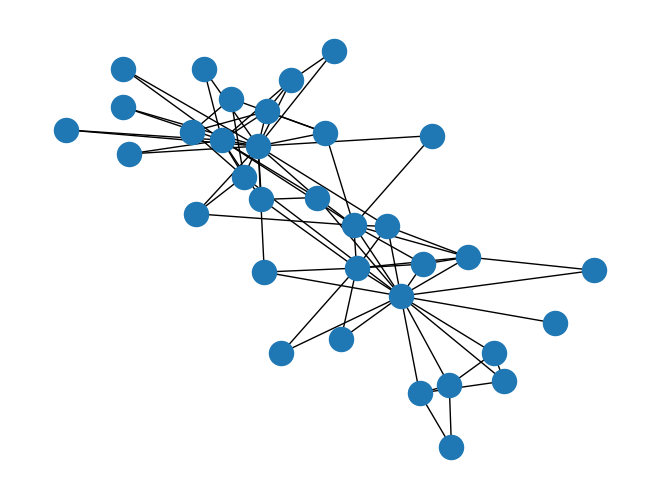

In [25]:
# G = nx.complete_graph(5)
nx.draw(G)

In [27]:
nx.write_graphml(G, './test-graph.xml')

In [32]:
def draw_communities(G, communities):
    colors = ['orange', 'blue', 'green', 'red']
    if len(colors) < len(greedy_c):
        print('Need add new colors')
        return 
        
    color_map = []
    communities_colors = { tuple(community): i for i, community in enumerate(communities) }
    
    for node in G:
        for community, color_index in communities_colors.items():
            if node in community:
                color_map.append(colors[color_index])
    
    nx.draw(G, node_color=color_map, with_labels=True)

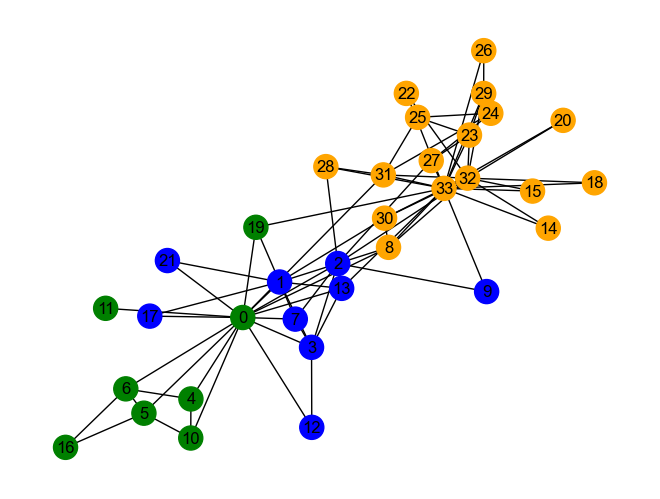

In [33]:
draw_communities(G, greedy_c)

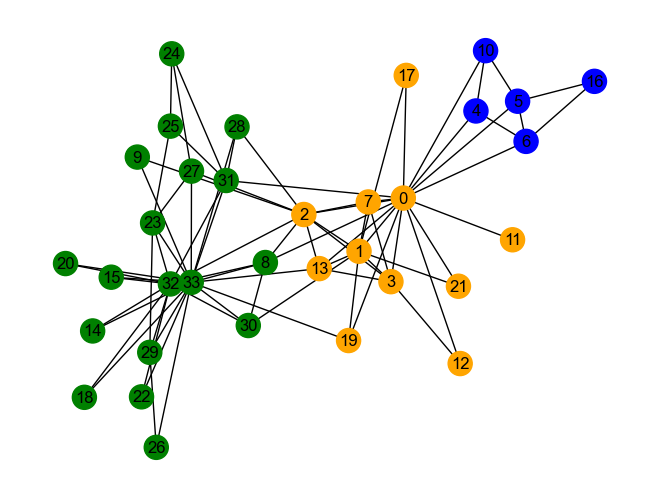

In [34]:
draw_communities(G, louvain_c)

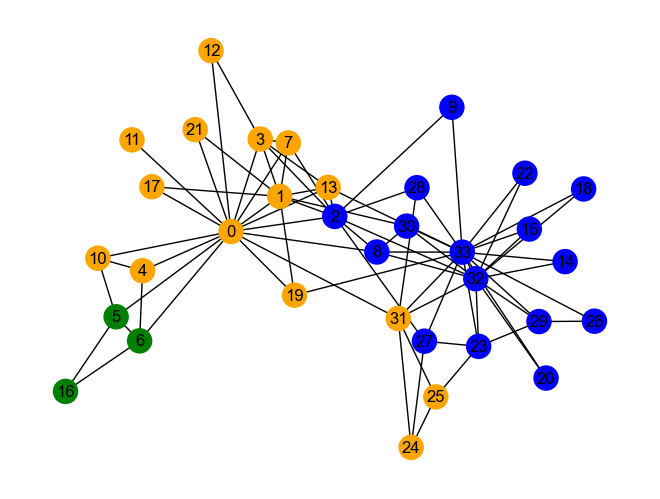

In [35]:
draw_communities(G, lpa_c)

In [168]:
df_edges = pd.read_csv('musae_facebook_edges.csv')
df_nodes = pd.read_csv('musae_facebook_target.csv')

In [223]:
df_nodes.head()

,id,facebook_id,page_name,page_type
0,0,145647315578475,The Voice of China 中国好声音,tvshow
1,1,191483281412,U.S. Consulate General Mumbai,government
2,2,144761358898518,ESET,company
3,3,568700043198473,Consulate General of Switzerland in Montreal,government
4,4,1408935539376139,Mark Bailey MP - Labor for Miller,politician


In [170]:
len(df_nodes), len(df_edges)

(22470, 171002)

In [171]:
count_nodes = 5000
count_links = 5

In [172]:
df_new_nodes = df_nodes[:count_nodes]
df_new_edges = df_edges[(df_edges['id_1'] < count_nodes) & (df_edges['id_2'] < count_nodes)]

In [175]:
len(df_new_nodes), len(df_new_edges)

(5000, 8445)

In [189]:
df_actual_nodes = df_new_nodes.copy()
df_actual_edges = df_new_edges.copy()
for node in df_nodes.index:
    if len(df_new_edges[df_new_edges['id_1'] == node]) < count_links:
        df_actual_nodes = df_actual_nodes[~df_actual_nodes['id'].isin([node])]
        df_actual_edges = df_actual_edges[~(df_actual_edges['id_1'].isin([node]) | df_actual_edges['id_2'].isin([node]))]

In [190]:
len(df_actual_nodes), len(df_actual_edges)

(485, 1473)

In [198]:
new_nodes = [int(node) for node in df_actual_nodes.index]
new_edges = [(int(first), int(second)) for first, second in df_actual_edges.values]

In [199]:
len(new_nodes), len(new_edges)

(485, 1473)

In [200]:
new_G = nx.Graph()
new_G.add_nodes_from(new_nodes)
new_G.add_edges_from(new_edges) 

In [201]:
len(new_G.nodes), len(new_G.edges)

(485, 1473)

In [119]:
# Data = open('new_edges.csv', "r")
# next(Data, None)
# G: nx.Graph = nx.parse_edgelist(Data, delimiter=',', create_using=nx.Graph(), nodetype=int, data=(('weight', float),))

In [202]:
net = Network()
net.add_nodes(new_nodes, label=new_nodes)
net.add_edges(new_edges)
net.show('clear_new_graph.html', notebook=False)

new_graph.html


In [208]:
types_to_int = {page_type: i for i, page_type in enumerate(np.unique(df_actual_nodes['page_type']))}
types_to_int

{'company': 0, 'government': 1, 'politician': 2, 'tvshow': 3}

In [ ]:
net = Network()
for node in new_nodes:
    net.add_node(
        node,
        label=node,
        group=types_to_int[df_actual_nodes.loc[node]['page_type']]
    )
net.add_edges(new_edges)

net.show('new_graph.html', notebook=False)

In [220]:
colors = ['red', 'orange', 'lightblue', 'lightgreen']
types_to_color = {page_type: color for color, page_type in zip(colors, np.unique(df_actual_nodes['page_type']))}
types_to_color

{'company': 'red',
 'government': 'orange',
 'politician': 'lightblue',
 'tvshow': 'lightgreen'}

In [221]:
net = Network()
for node in new_nodes:
    net.add_node(
        node,
        label=node,
        color=types_to_color[df_actual_nodes.loc[node]['page_type']]
    )
net.add_edges(new_edges)

net.show('new_graph_color.html', notebook=False)

new_graph_color.html


In [210]:
greedy_c, louvain_c, lpa_c = get_communities(new_G)

In [222]:
f'Greedy: {len(greedy_c)} Louvain: {len(louvain_c)}, LPA: {len(lpa_c)}'

'Greedy: 67 Louvain: 66, LPA: 86'

In [215]:
net = Network()
for group, community in enumerate(greedy_c):
    for node in community:
        net.add_node(
            node,
            label=node,
            group=group,
        )
net.add_edges(new_edges)

net.show('new_graph_greedy.html', notebook=False)

new_graph_greedy.html


In [216]:
net = Network()
for group, community in enumerate(louvain_c):
    for node in community:
        net.add_node(
            node,
            label=node,
            group=group,
        )
net.add_edges(new_edges)

net.show('new_graph_louvain.html', notebook=False)

new_graph_louvain.html


In [217]:
net = Network()
for group, community in enumerate(lpa_c):
    for node in community:
        net.add_node(
            node,
            label=node,
            group=group,
        )
net.add_edges(new_edges)

net.show('new_graph_lpa.html', notebook=False)

new_graph_lpa.html


In [78]:
# Data = open('musae_facebook_edges.csv', "r")
# next(Data, None)
# 
# G_full: nx.Graph = nx.parse_edgelist(Data, delimiter=',', create_using=nx.Graph(), nodetype=int, data=(('weight', float),))

In [ ]:
# full_net = Network()
# full_net.add_nodes(
#     list(G_full.nodes),  # node ids
#     # label=['Node #1', 'Node #2', 'Node #3', 'Node #4', 'Node #5'],  # node labels
#     # # node titles (display on mouse hover)
#     # title=['Main node', 'Just node', 'Just node', 'Just node', 'Node with self-loop'],
#     # color=['#d47415', '#22b512', '#42adf5', '#4a21b0', '#e627a3']  # node colors (HEX)
# )
# full_net.add_edges(list(G_full.edges))
# 
# full_net.show('full_graph.html', notebook=False)